# <center>$\underline{\textbf{AAG02 - Análise de Preços de Comic Books}}$<p>
<center> Braulio Lucas - 5° Periodo - Sistemas de Informação <p>
<center> Christian Scoralich - 3° Periodo - Ciencias da Computação

## $\textbf{1. Importando Bibliotecas}$

In [62]:
#Obtenção dos dados do site:
import requests
from urllib import request, response, error, parse #pegar url
from urllib.request import urlopen
from bs4 import BeautifulSoup #distrinchar o html
#Manipulação de dados, bases e geração de gráficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## $\textbf{2. Preparando Amostras}$

## 2.1 Amostra de 23 páginas do site panini.com.br

<p>Como dataset utilizamos a loja panini que vende diversos quadrinhos, selecionamos as amostras com todos os quadrinhos de ambas as editoras que estão listados no site da panini.
<p>Filtrando apenas por quadrinhos da DC comics, foram listadas 23 páginas contendo diversos quadrinhos com preços variando entre 9,90 e 250. 

### <p>2.2 Pegando amostras da DC comics referente a todas as paginas da loja panini.

In [63]:
precoDC = []

#Laço pra pegar as 23 páginas da DC
for i in range(23):
    url = 'https://loja.panini.com.br/panini/vitrines/comics-dc.aspx?pg='+ str(i)

    html = urlopen(url)
    soup = BeautifulSoup (html,"lxml")
    title = soup.title
    titleText = title.get_text()
    #print(titleText)
    figcaption = soup.find_all('div', class_='col-lg-3 col-md-3 col-sm-4 col-xs-6') #pegar o quadrado que eu quero com nome, preço
    
    for x in figcaption:
        #Pega os preços e trata os dados para float, trata também casos em que a classe do div muda
        try:
            precoDC.append(float(x.find('p', class_='price').get_text().replace('R$', '').replace(',','.')))
        except:
            precoDC.append(float(x.find('p', class_='total-price').get_text().replace('R$', '').replace(',','.')))
        #print(preco, i) 
    #print(figcaption)

### 3.0 Cálculos com a Amostra
   Contando as ocorrencias dos preços

In [64]:
#armazenar a quantidade de valores repetidos em um dicionario
counterDC = dict()
for n in precoDC:
    try:
        counterDC[n] +=1
    except KeyError:
        counterDC[n] = 1
#print(counterDC)


### 3.1 Gerando eixos do gráfico PMF

In [65]:
#calculo do eixo X e eixo Y da PMF
eixoXDC = []
eixoYDC = []
total = 0
totNumbers= len(precoDC) #total de elementos em preço
for key,value in counterDC.items():
    eixoXDC.append(key)
    eixoYDC.append(value/totNumbers)
    total = total + (value/totNumbers)

### 4. Gerando PMF
<p> Gráfico sem biblioteca

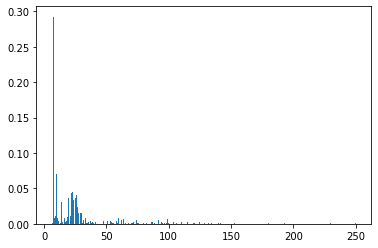

In [66]:
DCplot = plt.bar(eixoXDC,eixoYDC)
plt.show()

### PMF Gráfico com biblioteca

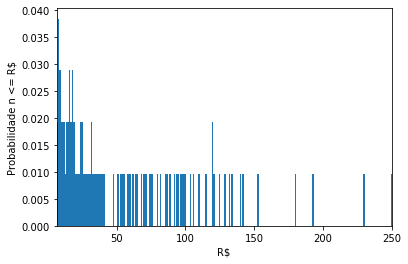

In [67]:
plt.hist(eixoXDC,density=True,bins=np.arange(len(precoDC))-0.5)
plt.xlim(min(eixoXDC),max(eixoXDC))
plt.xlabel('R$')
plt.ylabel(r'Probabilidade n <= R$')
plt.show()

## Realizando procedimentos para Marvel

In [68]:
precoMRV = []

#Laço pra pegar as 32 páginas da Marvel
for i in range(32):
    url = 'https://loja.panini.com.br/panini/vitrines/comics-marvel.aspx?pg='+ str(i)

    html = urlopen(url)
    soup = BeautifulSoup (html,"lxml")
    title = soup.title
    titleText = title.get_text()
    #print(titleText)
    figcaption = soup.find_all('div', class_='col-lg-3 col-md-3 col-sm-4 col-xs-6') #pegar o quadrado que eu quero com nome, preço
    
    for x in figcaption:
        #Pega os preços e trata os dados para float, trata também casos em que a classe do div muda
        try:
            precoMRV.append(float(x.find('p', class_='price').get_text().replace('R$', '').replace(',','.')))
        except:
            precoMRV.append(float(x.find('p', class_='total-price').get_text().replace('R$', '').replace(',','.')))
        #print(preco, i) 
    #print(figcaption)

In [69]:
#calculo do eixo X e eixo Y da PMF da DC
counterMRV = dict()
for n in precoMRV:
    try:
        counterMRV[n] +=1
    except KeyError:
        counterMRV[n] = 1
        
eixoXMRV = []
eixoYMRV = []
totNumbers= len(precoMRV) #total de elementos em preço
for key,value in counterMRV.items():
    eixoXMRV.append(key)
    eixoYMRV.append(value/totNumbers)
    total = total + (value/totNumbers)

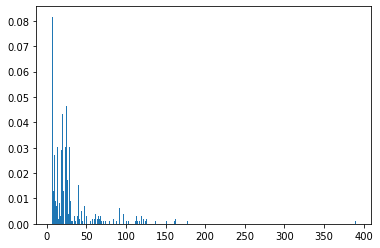

In [70]:
mrvplot = plt.bar(eixoXMRV,eixoYMRV)
plt.xlabel('R$')
plt.ylabel(r'Probabilidade n <= R$')
plt.show()

## 5.0 Conclusões
<p>Baseado nestes histogramas, aparenta-se que a Marvel tem mais revistas em quadrinho entre 9 e 50 e um outlier proximo dos 400.
<p>Enquanto a DC comics aparenta ter mais quadrinhos entre 50 e 150.
